Scenario I - Waiting Time Distribution
<br>
Case I: λ = 2 packets/ms, μ = 10 packets/ms
<br>
Case II: λ = 8 packets/ms, μ = 10 packets/ms

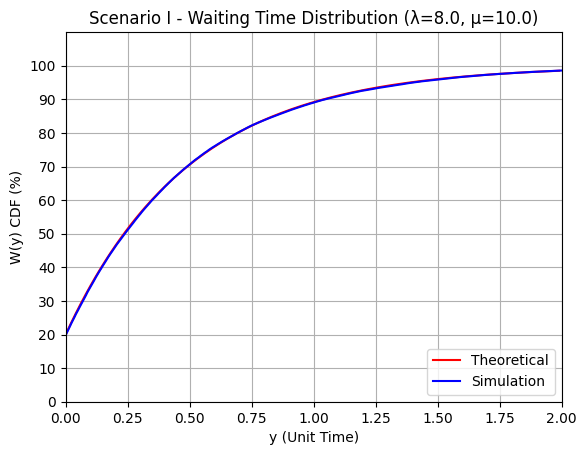

Mean Squared Error: 0.05276955821714765


In [78]:
import numpy as np
import matplotlib.pyplot as plt
import math

# The waiting time distribution formula
def CalculateWaitingTimeProbabilityCDF(Mu, Rho, eachWaitingTime):
  eachWaitingTimeProbabilityCDF = 1 - Rho * math.exp((-1) * Mu * (1 - Rho) * eachWaitingTime)
  eachWaitingTimeProbabilityCDF = eachWaitingTimeProbabilityCDF * 100
  return eachWaitingTimeProbabilityCDF

Lambda = 8.0
Mu = 10.0
Rho = Lambda / Mu

# Draw the CDF figure using theoretical values
waitingTime = np.arange(0, 2, 0.01)
waitingTimeProbabilityCDF = []
for eachWaitingTime in waitingTime:
  eachWaitingTimeProbabilityCDF = CalculateWaitingTimeProbabilityCDF(Mu, Rho, eachWaitingTime)
  waitingTimeProbabilityCDF.append(eachWaitingTimeProbabilityCDF)
plt.plot(waitingTime, waitingTimeProbabilityCDF, color = 'red')

# Randomly obtain the interarrival time and service time for each packet
packet = 100000
interArrivalTime = []
serviceTime = []
for i in range(packet):
  eachInterArrivalTime = np.random.exponential(1 / Lambda)
  interArrivalTime.append(eachInterArrivalTime)
  eachServiceTime = np.random.exponential(1 / Mu)
  serviceTime.append(eachServiceTime)

# Calculate the waiting time for each packet through interarrival time and service time
waitingTime = []
STotalTime = 0
QTotalTime = 0
waitingTime.append(0)
for i in range(1, packet):
  STotalTime += serviceTime[i - 1]
  QTotalTime += interArrivalTime[i]
  if STotalTime - QTotalTime <= 0:
    waitingTime.append(0)
    STotalTime = QTotalTime
  else:
    waitingTime.append(STotalTime - QTotalTime)
waitingTime.sort()

# Draw the CDF figure through network simulation
temp = []
waitingTimeProbabilityCDF = []
for i in range(packet):
  if waitingTime[i] > 0:
    temp.append(waitingTime[i])
    waitingTimeProbabilityCDF.append(((i + 1) / packet) * 100)
waitingTime = temp
plt.plot(waitingTime, waitingTimeProbabilityCDF, color = 'blue')

# Setting up the CDF figure
plt.title("Scenario I - Waiting Time Distribution (λ=" + str(Lambda) + ", μ=" + str(Mu) + ")")
plt.xlabel("y (Unit Time)")
plt.ylabel("W(y) CDF (%)")
plt.xlim(0, 2)
plt.ylim(0, 110)
plt.xticks(np.arange(0.0, 2.25, 0.25))
plt.yticks(np.arange(0, 110, 10))
plt.legend(['Theoretical', 'Simulation'], loc = "lower right")
plt.grid()
plt.show()

# Calculate MSE
MSE = 0
for i in range(len(waitingTime)):
  MSE = MSE + (waitingTimeProbabilityCDF[i] - CalculateWaitingTimeProbabilityCDF(Mu, Rho, waitingTime[i])) ** 2
MSE = MSE / len(waitingTime)
print("Mean Squared Error:", MSE)

Scenario I - System Time Distribution
<br>
Case I: λ = 2 packets/ms, μ = 10 packets/ms
<br>
Case II: λ = 8 packets/ms, μ = 10 packets/ms

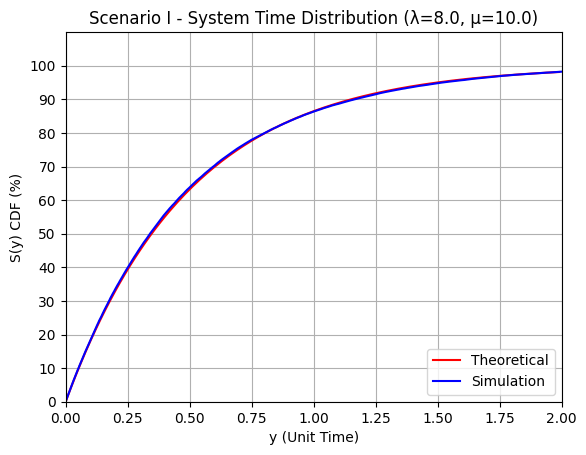

Mean Squared Error: 0.18152731080907855


In [79]:
import numpy as np
import matplotlib.pyplot as plt
import math

# The system time distribution formula
def CalculateSystemTimeProbabilityCDF(Mu, Rho, eachSystemTime):
  eachSystemTimeProbabilityCDF = 1 - math.exp((-1) * Mu * (1 - Rho) * eachSystemTime)
  eachSystemTimeProbabilityCDF = eachSystemTimeProbabilityCDF * 100
  return eachSystemTimeProbabilityCDF

Lambda = 8.0
Mu = 10.0
Rho = Lambda / Mu

# Plot the CDF using theoretical values
systemTime = np.arange(0, 2, 0.01)
systemTimeProbabilityCDF = []
for eachSystemTime in systemTime:
  eachSystemTimeProbabilityCDF = CalculateSystemTimeProbabilityCDF(Mu, Rho, eachSystemTime)
  systemTimeProbabilityCDF.append(eachSystemTimeProbabilityCDF)
plt.plot(systemTime, systemTimeProbabilityCDF, color = 'red')

# Randomly obtain the interarrival time and service time for each packet
packet = 100000
interArrivalTime = []
serviceTime = []
for i in range(packet):
  eachInterArrivalTime = np.random.exponential(1 / Lambda)
  interArrivalTime.append(eachInterArrivalTime)
  eachServiceTime = np.random.exponential(1 / Mu)
  serviceTime.append(eachServiceTime)

# Calculate the waiting time for each packet through interarrival time and service time
waitingTime = []
STotalTime = 0
QTotalTime = 0
waitingTime.append(0)
for i in range(1, packet):
  STotalTime += serviceTime[i - 1]
  QTotalTime += interArrivalTime[i]
  if STotalTime - QTotalTime <= 0:
    waitingTime.append(0)
    STotalTime = QTotalTime
  else:
    waitingTime.append(STotalTime - QTotalTime)

# Draw the CDF figure through network simulation
systemTime = []
for i in range(packet):
  systemTime.append(waitingTime[i] + serviceTime[i])
systemTime.sort()
systemTimeProbabilityCDF = []
for i in range(packet):
  systemTimeProbabilityCDF.append(((i + 1) / packet) * 100)
plt.plot(systemTime, systemTimeProbabilityCDF, color = 'blue')

# Setting up the CDF figure
plt.title("Scenario I - System Time Distribution (λ=" + str(Lambda) + ", μ=" + str(Mu) + ")")
plt.xlabel("y (Unit Time)")
plt.ylabel("S(y) CDF (%)")
plt.xlim(0, 2)
plt.ylim(0, 110)
plt.xticks(np.arange(0.0, 2.25, 0.25))
plt.yticks(np.arange(0, 110, 10))
plt.legend(['Theoretical', 'Simulation'], loc = "lower right")
plt.grid()
plt.show()

# Calculate MSE
MSE = 0
for i in range(len(systemTime)):
  MSE = MSE + (systemTimeProbabilityCDF[i] - CalculateSystemTimeProbabilityCDF(Mu, Rho, systemTime[i])) ** 2
MSE = MSE / len(systemTime)
print("Mean Squared Error:", MSE)